In [214]:
import pandas as pd
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("vgsales.csv")
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


# Note

Ce dataset contient une liste des jeux vidéo ayant comptabilisé au minimum un total de 100 000 exemplaires vendus.

In [215]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Représentation graphique

## Choisir les données à représenter

On regroupe les données par rapport à un label.

In [222]:
label_to_group = "Year" # on peut prendre un autre label par exemple le genre, les editeurs etc...

On va regarder pour chaque une de ces années les ventes des differents zones géographique.

In [223]:
label_locations = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

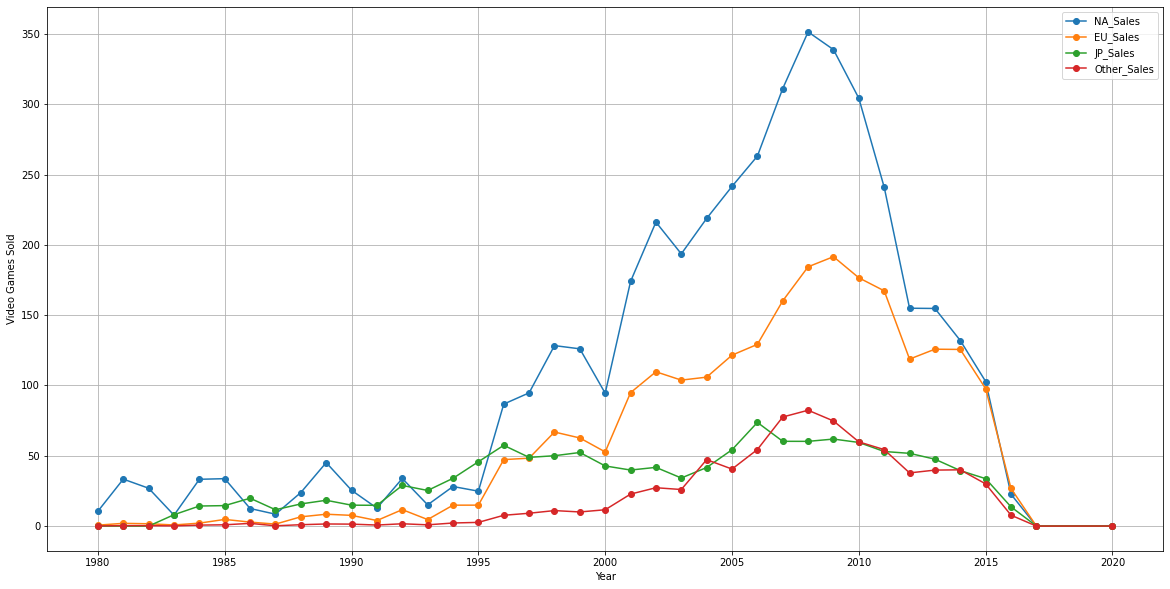

In [229]:
plt.figure(figsize=(20,10))

for location in label_locations :
    dt_grp = data.groupby(label_to_group)[location].sum() # on cumule les ventes pour chaque année
    plt.plot(dt_grp.index, dt_grp, "o-", label=location)
    
plt.xlabel('Year')
plt.ylabel('Video Games Sold')
plt.grid(True)
plt.legend()
plt.show()

## Observation

Le graph nous montre que le marché nord amérique à été le premier marché du jeux vidéo. Après la seconde partie des années 1990 le marché va décoller en nombre de jeu vendu jusqu'a son maximum en 2008.
La chute à partir de 2008 est probablement du à la dimutions des ventes physiques des jeux.
On peut remarquer que les données après 2017 sont manquante. (les jeux vidéo ce vende toujours). L'absence de ces données pourrait etre du au fait que les datas datent de 2017 et les éditeurs n'ayant pas encore communiqué sur les ventes de leurs derniers jeux à l'époque (provoquant la chute observé sur le graph).
Les derniers années ne devrait donc pas pris en compte pour de futures predictions ou alors en ayant cette observation en tête.

# Heatmap

On regroupe les données par rapport à un label.

In [239]:
label_to_group = "Genre" # on peut prendre un autre label par exemple les consoles, les editeurs etc...

In [246]:
new_data = data[[label_to_group, 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] # on ne garde que
                                                                                # les données qui nous interesses.

<AxesSubplot:ylabel='Genre'>

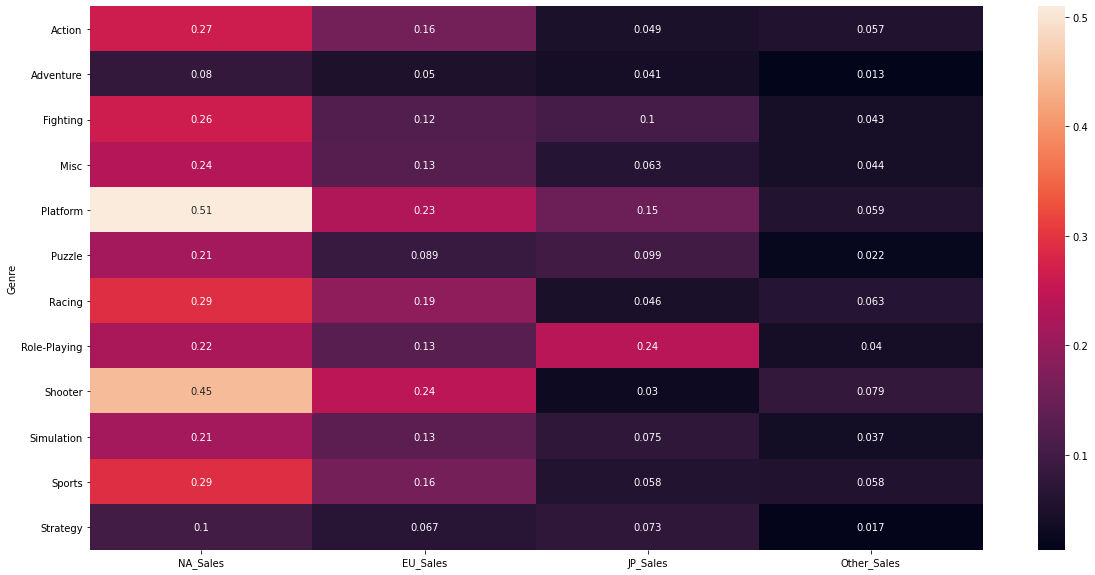

In [247]:
sales = new_data.groupby(label_to_group).mean() # on prend la moyenne de toutes les ventes pour ce genre.
plt.figure(figsize = (20, 10))
sns.heatmap(sales, annot = True)

<AxesSubplot:ylabel='Genre'>

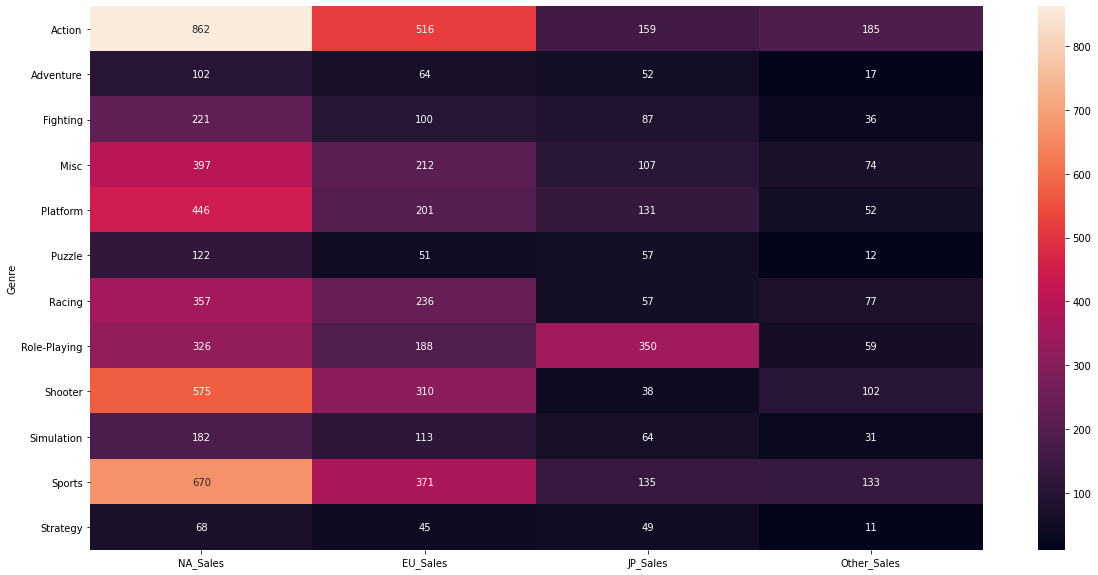

In [250]:
sales = new_data.groupby(label_to_group).sum() #ici le volume de vente total pour le genre
plt.figure(figsize = (20,10))
sns.heatmap(sales, annot=True, fmt= '.0f')

The heatmap above show the genre with the most potentiel of sell in each country.

## Observation

On peut observer que meme si le volume de vente total est élevé sur certain secteur, il n'est pas pour autant forcement le rentable en terme de vente moyenne. Le secteur étant probablement saturé par le nombre de jeux du meme genre (ex: les jeux d'action en europe).

# Corrélation entre les labels sans transformations des données

<AxesSubplot:>

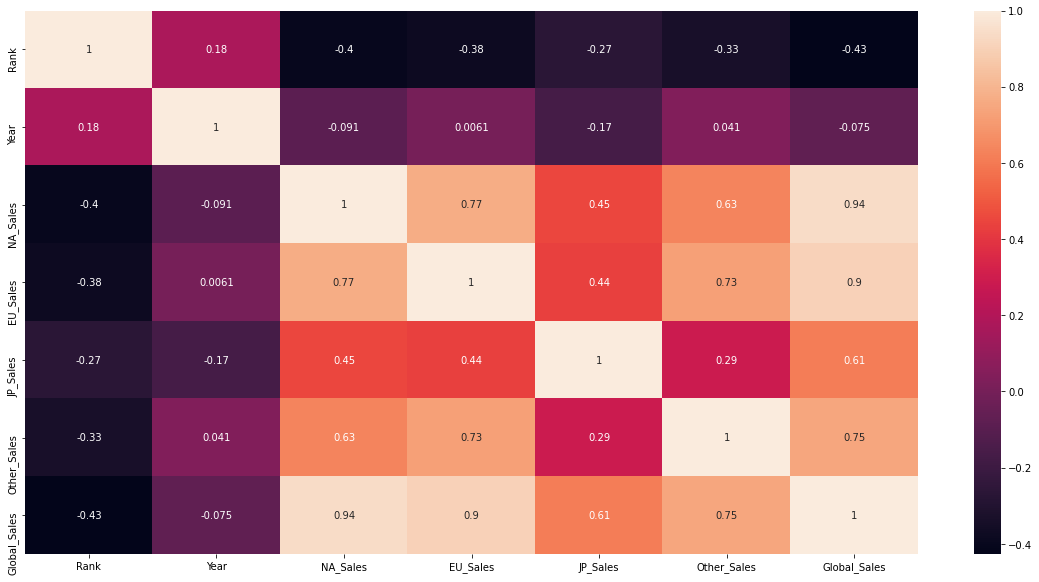

In [254]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(), annot=True)

## Observation

Il n'y a que les ventes qui ont un lien entre elles. On peut distinguer que le marché japonais ce démarque des autres le plus. Le public ayant probablement des habitudes de consomation vis à vis du jeu video qui leur est propre.